# MNIST

Otra vez, utilizamos el conjunto MNIST.

In [1]:
%matplotlib inline
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.asarray(x_train, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.int32)
x_test = np.asarray(x_test, dtype=np.float32)
y_test = np.asarray(y_test, dtype=np.int32)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1] ** 2))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1] ** 2))
x_train /= 255
x_test /= 255


def to_output(y):
    y_r = np.zeros((y.shape[0], 10))
    for i, v in enumerate(y):
        y_r[i, v] = 1
    return y_r

Using Theano backend.
Can not use cuDNN on context None: Disabled by dnn.enabled flag
Mapped name None to device cuda: GeForce GTX 960M (0000:02:00.0)


# Perceptrón

El preceptrón es una estructura que trata de imitar el funcionamiento de una neurona.

![Neurona](img/Neuron.png)

> Fig. 1: [Imágen Neurona Wikipedia](https://en.wikipedia.org/wiki/Neuron) <br>

Donde el modelo se simplifica a: <br>

![Perceptrón](img/Perceptron.png) <br>

> Fig. 2: Perceptrón

Considerando $\overline{x}=(x_{1}, x_{2},...,x_{n})$ y $\overline{w}=(w_{1}, w_{2},...,w_{n})$: <br>
$$percept(\overline{x})=f(\overline{x} \cdot \overline{w} + bias)=f(\sum(x_{i} \cdot x_{i} )+ bias)$$

# Red neuronal: Perceptrón multi-capa
La red neuronal más sencilla, conocida como perceptrón multi-capa, no es más que capas de preceptrones aplicadas una sobre la otra.

![Capa de preceptrones](img/capa.png)

> Fig. 3: Capa de preceptrones

![Perceptrón multi-capa](img/ann.png)

> Fig. 4: Perceptrón multi-capa

Entonces un preceptron multi-capa tiene la siguiente forma:

$$l_{1}=f_{1}(\overline{x} \cdot W_{1} + \overline{bias_{1}})$$

$$l_{2}=f_{2}(\overline{l_{1}} \cdot W_{2} + \overline{bias_{2}})$$

$$...$$

$$l_{N}=f_{N}(\overline{l_{N-1}} \cdot W_{N} + \overline{bias_{N}})$$

Es importante destacar que, dado una función de error, calcular el gradiente para cada parámetro de la red, sea $W_{i}$ o $bias_{i}$, es simplemente aplicar la regla de la cadena en repetidas oscaciones.


In [6]:
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(200, input_dim=x_train.shape[1], activation='tanh'))
model.add(Dense(100, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
print(model.summary())

print('Model score: {}'.format(model.evaluate(x_test, to_output(y_test), verbose=False)))
model.fit(x_train, to_output(y_train), epochs=10)
print('Model score: {}'.format(model.evaluate(x_test, to_output(y_test), verbose=False)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_6 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________
None
Model score: [2.4601637657165529, 0.091899999999999996]
Epoch 1/10
60000/60000 [==============================] - 7s - loss: 0.5452 - categorical_accuracy: 0.8579     
Epoch 2/10
60000/60000 [==============================] - 7s - loss: 0.3124 - categorical_accuracy: 0.9115     
Epoch 3/10
60000/60000 [==============================] - 7s - loss: 0.2694 - categorical_accuracy: 0.9224     
Epo

## Redes neuronales: tipos de capas
Además de este tipo de redes neuronales, existen otro tipo de capas que se pueden combinar para integrar una red neuronal. Por ejemplo, las capas convolucionales. Estas son utilizadas principalmente para tratar imágenes, aunque también han sido efectivas en el tratamiento de texto. A diferencia de las capas densas cuya salida depende de todas las entradas, las capas convolucionales generan salidas que solo relacionan subconjunto de las entradas. En particular, relacionan elementos que se encuentran cercanos en la entrada. <br>

![Convolutional](img/conv.png)

> Fig. 5 Red neuronal convolucional 

Este tipo de procesamiento de imágenes no es atípico, ya que el uso de matrices convolucionales (kernels o mascaras) es práctica común. Sin embargo, a diferencia de la aplicación clásica en donde la matriz viene dada dependiendo del tipo de operación a realiza, las capas convolucionales aprenden los pesos.<br>
Adam W. Harley diseño un [sitio Web](http://scs.ryerson.ca/~aharley/vis/) que intenta facilitar la comprensión del funcionamiento de las redes neuronales a través de visualización computacional.

In [3]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Lambda

(x_train_c, y_train_c), (x_test_c, y_test_c) = mnist.load_data()
x_train_c = np.asarray(x_train_c, dtype=np.float32)
y_train_c = np.asarray(y_train_c, dtype=np.int32)
x_test_c = np.asarray(x_test_c, dtype=np.float32)
y_test_c = np.asarray(y_test_c, dtype=np.int32)

x_train_c = x_train_c.reshape((x_train_c.shape[0], x_train_c.shape[1], x_train_c.shape[2], 1))
x_test_c = x_test_c.reshape((x_test_c.shape[0], x_test_c.shape[1], x_test_c.shape[2], 1))
#x_train_c /= 255
#x_test_c /= 255

model = Sequential()
model.add(Lambda(lambda x: x/255, input_shape=(x_train_c.shape[1], x_train_c.shape[2], x_train_c.shape[3]),
                 output_shape=(x_train_c.shape[1], x_train_c.shape[2], x_train_c.shape[3])))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

print('Model score: {}'.format(model.evaluate(x_test_c, to_output(y_test_c), verbose=False)))
model.fit(x_train_c, to_output(y_train_c), epochs=10)
print('Model score: {}'.format(model.evaluate(x_test_c, to_output(y_test_c), verbose=False)))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 28L, 28L, 1L)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26L, 26L, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13L, 13L, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11L, 11L, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5L, 5L, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                4010      
Total para

## ¿Qué sucede en una CNN?
El siguiente código permite calcular la salida de cada capa convolucional con el objetivo de observar cómo las capas convolucionales generan nuevas imágenes. 

In [4]:
from keras import backend as K
outputs = [l.output for l in model.layers if 'conv2d' in l.name]
outputs.append(model.output)
im_placeHolder = model.input
fc = K.function([im_placeHolder], outputs)

Clase: 3
Imagen


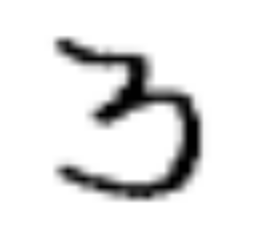

Convolutional layer


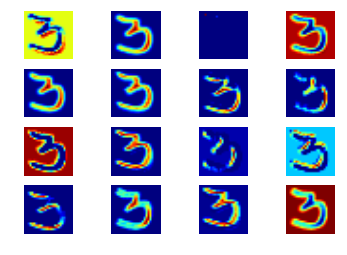

Convolutional layer


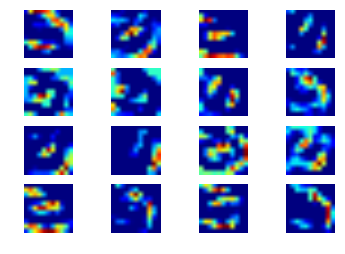

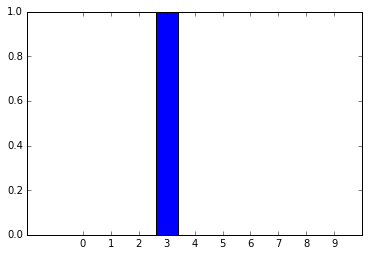

Probabilidades: [  2.18191811e-08   1.69708354e-08   1.13120446e-08   9.99967456e-01
   4.74098920e-11   3.24368957e-05   2.39691540e-13   5.27940891e-08
   7.44931061e-11   1.38341292e-07]


In [8]:
pos = 780
print 'Clase: {}'.format(y_test_c[pos])
print 'Imagen'
plt.imshow(x_test_c[pos:pos+1, :, :, :].reshape((28, 28)), cmap='Greys')
plt.axis('off')
plt.show()
outputs = fc([x_test_c[pos:pos+1, :, :, :]])
for o in outputs[:-1]:
    print 'Convolutional layer'
    for i in xrange(0,16):
        plt.subplot(4, 4, i + 1)
        plt.imshow(o[0, :, :, i])
        plt.axis('off')
    plt.show()
xlocations = np.array(range(len(outputs[-1][0, :]))) - 0.4
plt.bar(xlocations, outputs[-1][0, :])
plt.xticks(range(0, 10))
plt.show()
print 'Probabilidades: {}'.format(outputs[-1][0, :])

## Otros temas avanzados

+ Overfitting.
+ Underfitting.
+ Regularización.
+ Métricas distintas al accuracy.
+ Redes Neuronales convolucionales.
+ Redes Neuronales recurrentes.
+ Generative adversarial networks.
+ Deep Belief networks.
+ ...


## Lecturas y recusos adicionales

+ Adam W. Harley. An Interactive Node-Link Visualization of Convolutional Neural Networks. http://scs.ryerson.ca/~aharley/vis/
+ Andrew Ng. Curso: Aprendizaje automático. Coursera. https://www.coursera.org/learn/machine-learning
+ Ian Goodfellow Yoshua Bengio and Aaron Courville. Deep Learning. MIT Press. 2016. http://www.deeplearningbook.org
+ Mnih, Volodymyr; Kavukcuoglu, Koray; Silver, David; et.al. Human-level control through deep reinforcement learning. Naturehttp://dx.doi.org/10.1038/nature14236
+ Alsharif, O. and Ouyang, T. and Beaufays, F. and Shumin Zhai and Breuel, T. and Schalkwyk, J. Long short term memory neural network for keyboard gesture decoding, IEEE International Conference in Acoustics, Speech and Signal Processing (ICASSP), 2015 
+ Jürgen Schmidhuber Deep learning in neural networks: An overview Neural Networks, Volume 61, January 2015, Pages 85-117, ISSN 0893-6080 http://dx.doi.org/10.1016/j.neunet.2014.09.003.
+ LeCun, Yann; Bengio, Yoshua; Hinton, Geoffrey. Deep learning. Nature. http://dx.doi.org/10.1038/nature14539 
+ Ilya Sutskever and Oriol Vinyals and Quoc V. Le. Sequence to Sequence Learning with Neural Networks in Proc. NIPS (Montreal, CA:, 2014).
+ Jeffrey Donahue, Lisa Anne Hendricks, Sergio Guadarrama, Marcus Rohrbach, Subhashini Venugopalan, Kate Saenko, Trevor Darrell. Long-Term Recurrent Convolutional Networks for Visual Recognition and Description. The IEEE Conference on Computer Vision and Pattern Recognition (CVPR), 2015, pp. 2625-2634.
+ Ciregan, U. Meier and J. Schmidhuber. "Multi-column deep neural networks for image classification," Computer Vision and Pattern Recognition (CVPR), 2012 IEEE Conference on, Providence, RI, 2012, pp. 3642-3649.
+ Siraj Raval. How to Simulate a Self-Driving Car. https://www.youtube.com/watch?v=EaY5QiZwSP4 https://github.com/llSourcell/How_to_simulate_a_self_driving_car